# Requirements

In [1]:
import pandas as pd
import torch
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# Add as many imports as you need.
torch.cuda.is_available()

True

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('amazon_stock_price.csv')
data.head()

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000


Explore the dataset using visualizations of your choice.

In [4]:
# Write your code here. Add as many boxes as you need.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685 entries, 0 to 6684
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6685 non-null   object 
 1   open    6685 non-null   float64
 2   high    6685 non-null   float64
 3   low     6685 non-null   float64
 4   close   6685 non-null   float64
 5   volume  6685 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 313.5+ KB


In [5]:
data.describe()

,open,high,low,close,volume
count,6685.000000,6685.000000,6685.000000,6685.000000,6.685000e+03
mean,34.046304,34.456169,33.601226,34.036846,1.403635e+08
std,49.872534,50.458248,49.228487,49.844164,1.390697e+08
min,0.070300,0.072400,0.065600,0.069800,9.744000e+06
25%,2.037000,2.075000,1.995000,2.042500,6.716800e+07
50%,7.129500,7.183500,6.989500,7.108500,1.039520e+08
75%,45.352000,45.480500,44.875000,45.189000,1.587760e+08
max,187.200000,188.654000,184.839500,186.570500,2.086584e+09


In [6]:
data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

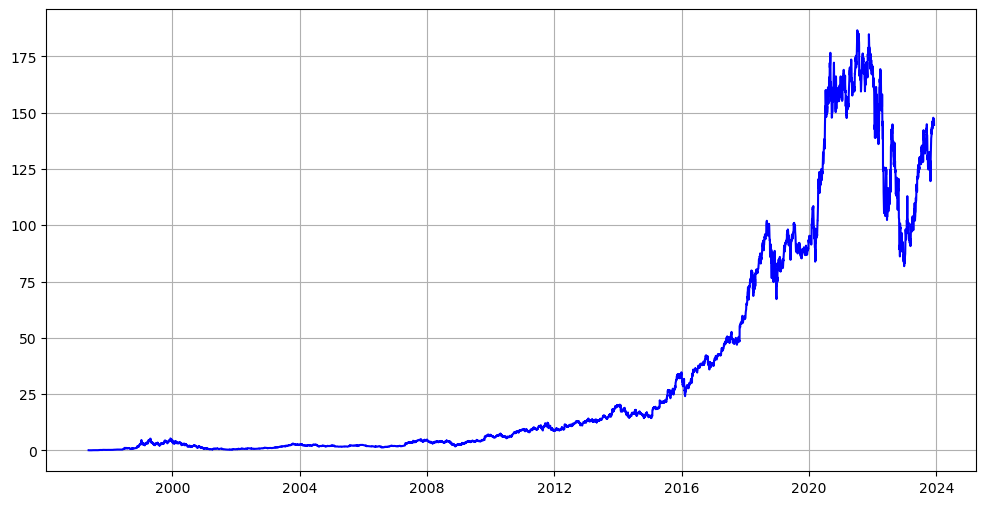

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(data['date']),data['close'], label='Close Price', color='blue')
plt.grid()
plt.show()

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [8]:
# Write your code here. Add as many boxes as you need.
data['date'] = pd.to_datetime(data['date'])
data.set_index(keys=["date"], inplace=True)
data.sort_index(inplace=True)
data

,open,high,low,close,volume
date,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200


In [9]:
for lag in range(1,8):
    data[f'close_lag_{lag}'] = data['close'].shift(lag)

In [10]:
data.head()

,open,high,low,close,volume,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
date,,,,,,,,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000,0.0979,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000,0.0865,0.0979,NaN,NaN,NaN,NaN,NaN
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000,0.0854,0.0865,0.0979,NaN,NaN,NaN,NaN
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000,0.0818,0.0854,0.0865,0.0979,NaN,NaN,NaN


In [20]:
data = data.dropna()
data

,open,high,low,close,volume,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7
date,,,,,,,,,,,,
1997-05-27,0.0755,0.0823,0.0729,0.0792,173952000,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865,0.0979
1997-05-28,0.0812,0.0818,0.0766,0.0766,91488000,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865
1997-05-29,0.0771,0.0771,0.0740,0.0753,69456000,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854
1997-05-30,0.0750,0.0755,0.0740,0.0750,51888000,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818
1997-06-02,0.0755,0.0766,0.0750,0.0755,11832000,0.0750,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000,146.3200,147.0300,147.7300,146.7400,146.7100,143.9000,146.1300
2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600,146.0900,146.3200,147.0300,147.7300,146.7400,146.7100,143.9000
2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200,147.0300,146.0900,146.3200,147.0300,147.7300,146.7400,146.7100


In [23]:
features = [f'close_lag_{lag}' for lag in range(1,8)]
target='close'
features

['close_lag_1',
 'close_lag_2',
 'close_lag_3',
 'close_lag_4',
 'close_lag_5',
 'close_lag_6',
 'close_lag_7']

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [13]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [14]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Use the trained model to make predictions for the test set.

In [15]:
# Write your code here. Add as many boxes as you need.
y_pred = model_rfr.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [16]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('RadnomForest metrics:')
print('MSE:',mse)
print('MAE:',mae)
print('R2:',r2)

RadnomForest metrics:
MSE: 1854.4913398555816
MAE: 31.78554287050897
R2: -0.8227460466969545


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [17]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor
model_xg = XGBRegressor(n_estimators=100, learning_rate=0.01, random_state=42)
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [18]:
# Write your code here. Add as many boxes as you need.
y_pred = model_xg.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [19]:
# Write your code here. Add as many boxes as you need.
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('XGBoost metrics:')
print('MSE:',mse)
print('MAE:',mae)
print('R2:',r2)

XGBoost metrics:
MSE: 5319.309946192264
MAE: 65.76952692918151
R2: -4.228253681860167
